<a href="https://colab.research.google.com/github/kushwahapushkar/Company_Financials/blob/main/Company_Financials_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Cleaning**

In [24]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/Financials.csv")

# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_')

print("Cleaned Columns:")
print(df.columns.tolist())

Cleaned Columns:
['Segment', 'Country', 'Product', 'Discount_Band', 'Units_Sold', 'Manufacturing_Price', 'Sale_Price', 'Gross_Sales', 'Discounts', 'Sales', 'COGS', 'Profit', 'Date', 'Month_Number', 'Month_Name', 'Year']


In [4]:
def clean_currency(s):
    """
    Cleans and converts currency-like strings to numeric.
    Handles $, commas, parentheses (negative values), and blanks.
    """
    s = s.fillna('').astype(str).str.strip()

    # Detect numbers wrapped in parentheses, and spaces
    neg_mask = s.str.contains(r'\(.*\)', regex=True)

    # Remove $, commas, and parentheses
    s = s.str.replace(r'[\$,()]', '', regex=True)

    # Convert to numeric (invalid values become NaN)
    s = pd.to_numeric(s.replace('', np.nan), errors='coerce')

    # Apply negative sign to rows originally having parentheses
    s.loc[neg_mask] = -abs(s.loc[neg_mask])

    return s


In [5]:
numeric_cols = [
    'Units_Sold', 'Manufacturing_Price', 'Sale_Price',
    'Gross_Sales', 'Discounts', 'Sales', 'COGS', 'Profit'
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = clean_currency(df[col])

print("\n Numeric columns cleaned successfully!")


 Numeric columns cleaned successfully!


In [6]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

if 'Month_Number' in df.columns and 'Year' in df.columns:
    df['Year_Month'] = (
        df['Year'].astype(str) + '-' +
        df['Month_Number'].astype(str).str.zfill(2)
    )

In [7]:
print("\n Data types after cleaning:")
print(df.dtypes)

print("\n Summary stats for numeric columns:")
print(df[numeric_cols].describe().T)


 Data types after cleaning:
Segment                        object
Country                        object
Product                        object
Discount_Band                  object
Units_Sold                    float64
Manufacturing_Price           float64
Sale_Price                    float64
Gross_Sales                   float64
Discounts                     float64
Sales                         float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
Month_Number                    int64
Month_Name                     object
Year                            int64
Year_Month                     object
dtype: object

 Summary stats for numeric columns:
                     count           mean            std       min       25%  \
Units_Sold           700.0    1608.294286     867.427859    200.00    905.00   
Manufacturing_Price  700.0      96.477143     108.602612      3.00      5.00   
Sale_Price           700.0     118

In [8]:
negatives = (df[numeric_cols] < 0).sum()
print("\n Negative value counts per column:")
print(negatives)

# Show actual negative-profit records
negative_profits = df[df['Profit'] < 0]
print("\n Negative profit transactions found:")
print(negative_profits[['Country', 'Product', 'Profit']].head())


 Negative value counts per column:
Units_Sold              0
Manufacturing_Price     0
Sale_Price              0
Gross_Sales             0
Discounts               0
Sales                   0
COGS                    0
Profit                 58
dtype: int64

 Negative profit transactions found:
                      Country    Product   Profit
232  United States of America   Montana  -4533.75
237  United States of America     Paseo  -3740.00
238                    France     Paseo  -2981.25
246  United States of America     Paseo  -1076.25
247                    France     Paseo   -880.00


In [9]:
df.to_csv("/content/Financials_Cleaned_new.csv", index=False)
print("\n Clean dataset saved as: Financials_Cleaned.csv")


 Clean dataset saved as: Financials_Cleaned.csv


In [10]:
df['Profit_Margin_%'] = (df['Profit'] / df['Sales']) * 100


In [23]:
df.head()


,Segment,Country,Product,Discount_Band,Units_Sold,Manufacturing_Price,Sale_Price,Gross_Sales,Discounts,Sales,COGS,Profit,Date,Month_Number,Month_Name,Year,Year_Month,Profit_Margin_%
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,2014-01-01,1,January,2014,2014-01,50.000000
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,2014-01-01,1,January,2014,2014-01,50.000000
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,2014-01-06,6,June,2014,2014-06,33.333333
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,2014-01-06,6,June,2014,2014-06,33.333333
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,2014-01-06,6,June,2014,2014-06,33.333333


# **Vizualisation**


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', palette='viridis')
plt.rcParams.update({'figure.figsize': (8,5), 'axes.titlesize': 14, 'axes.labelsize': 12})

In [14]:
numeric_cols = [
    'Units_Sold', 'Manufacturing_Price', 'Sale_Price',
    'Gross_Sales', 'Discounts', 'Sales', 'COGS', 'Profit'
]

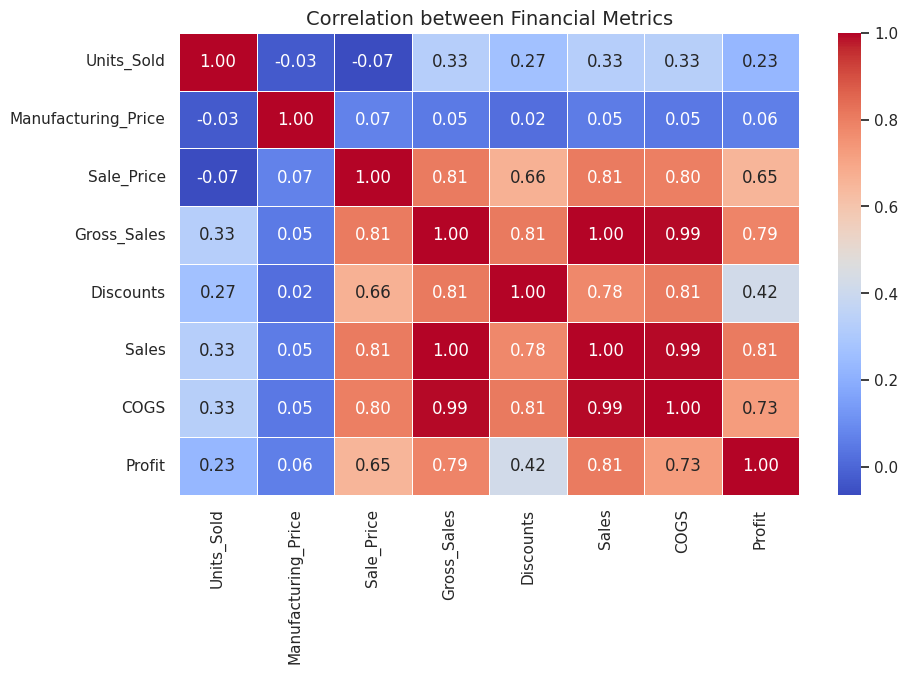

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation between Financial Metrics")
plt.show()

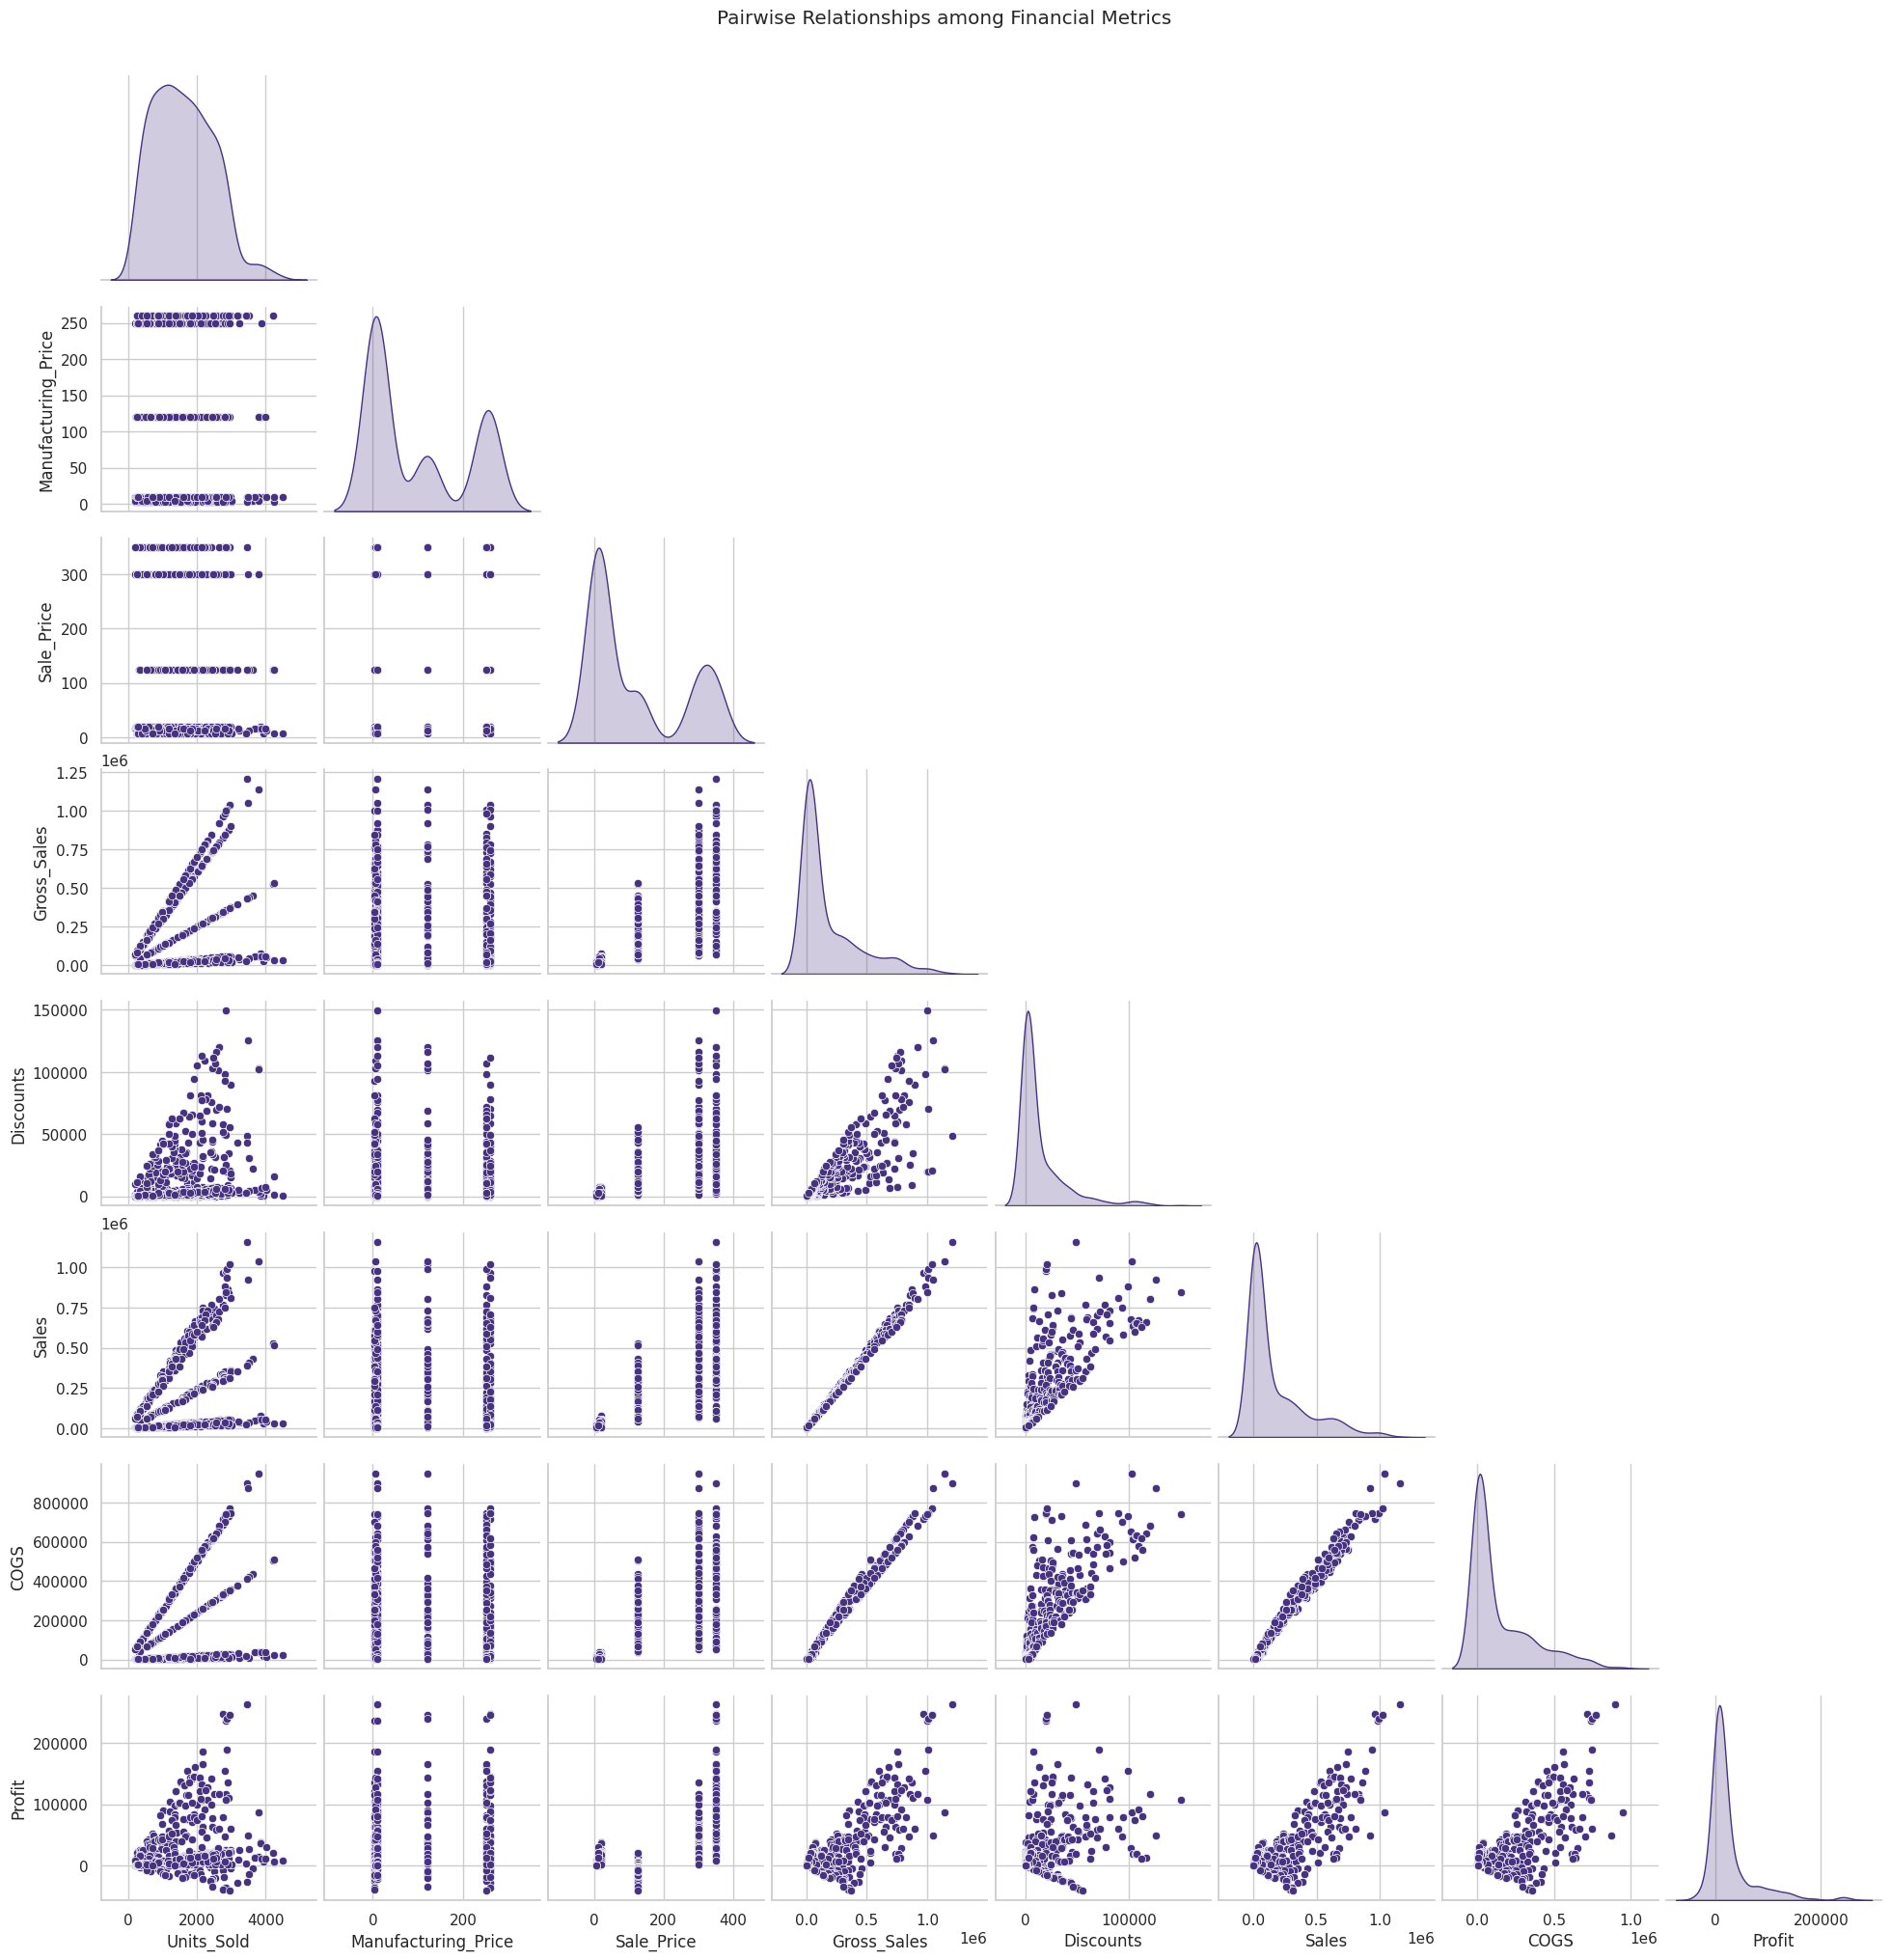

In [16]:
sns.pairplot(df[numeric_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships among Financial Metrics", y=1.02)
plt.show()

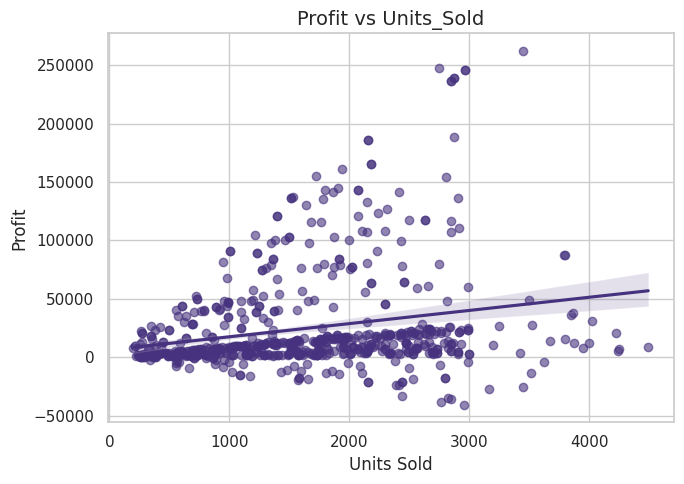

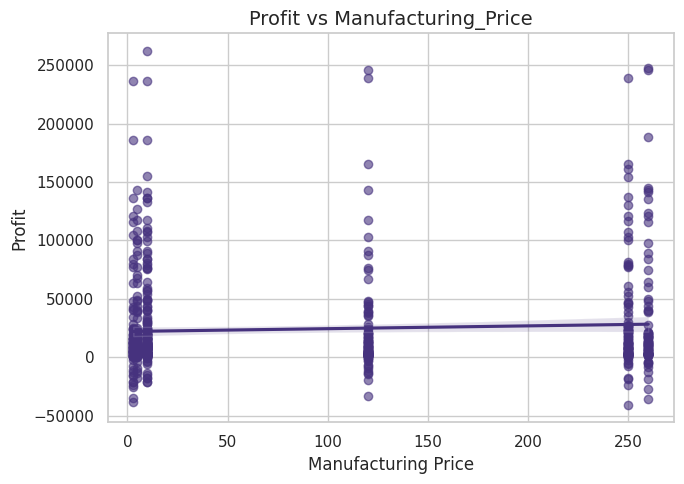

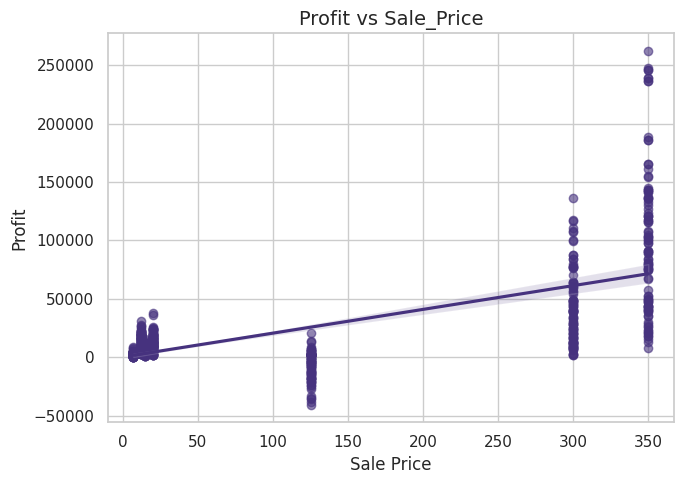

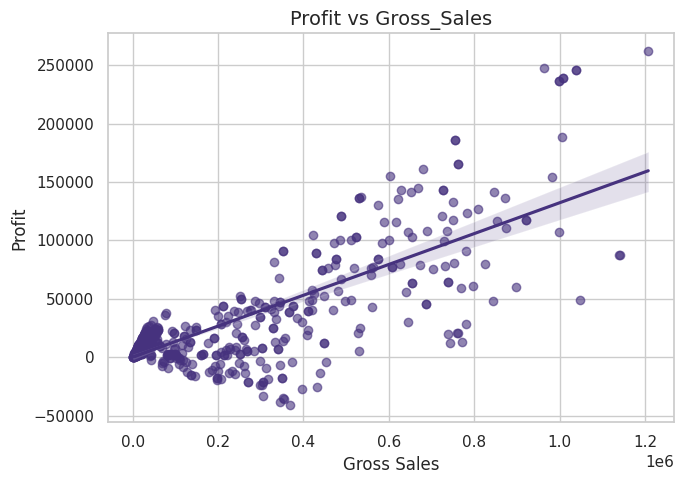

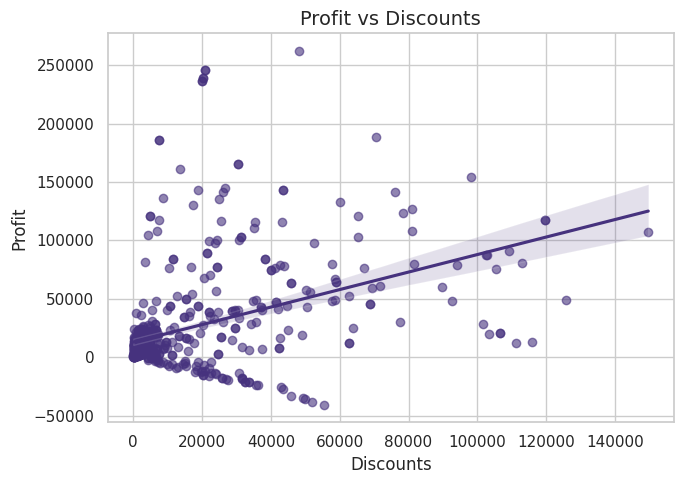

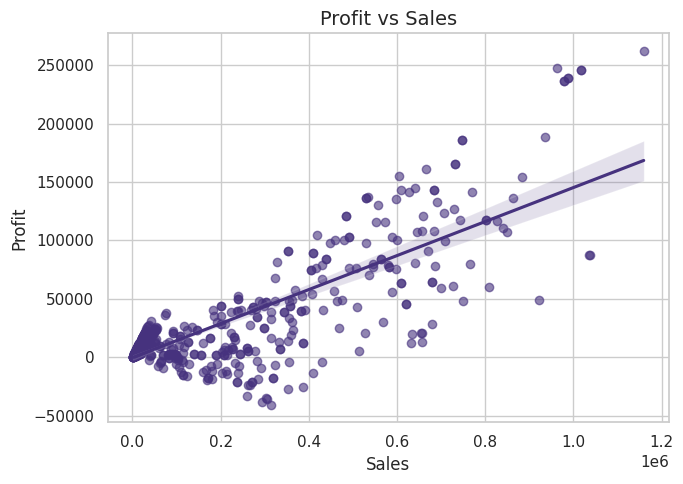

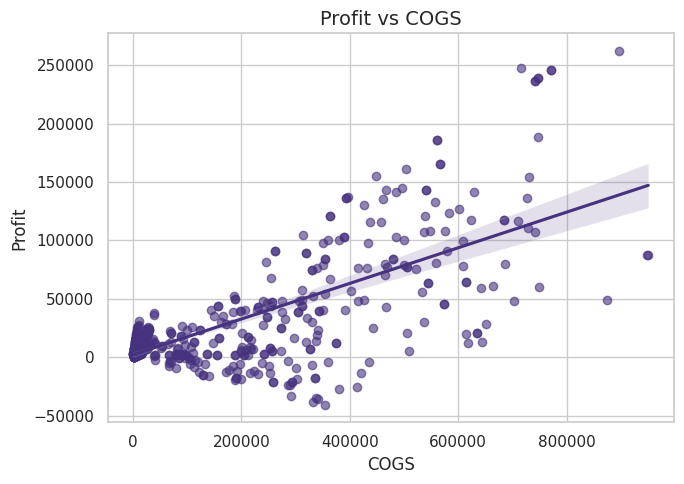

In [17]:
targets = ['Units_Sold', 'Manufacturing_Price', 'Sale_Price',
           'Gross_Sales', 'Discounts', 'Sales', 'COGS']

for col in targets:
    if col in df.columns:
        plt.figure(figsize=(7,5))
        sns.regplot(data=df, x=col, y='Profit', scatter_kws={'alpha':0.6})
        plt.title(f"Profit vs {col}")
        plt.xlabel(col.replace('_', ' '))
        plt.ylabel("Profit")
        plt.tight_layout()
        plt.show()

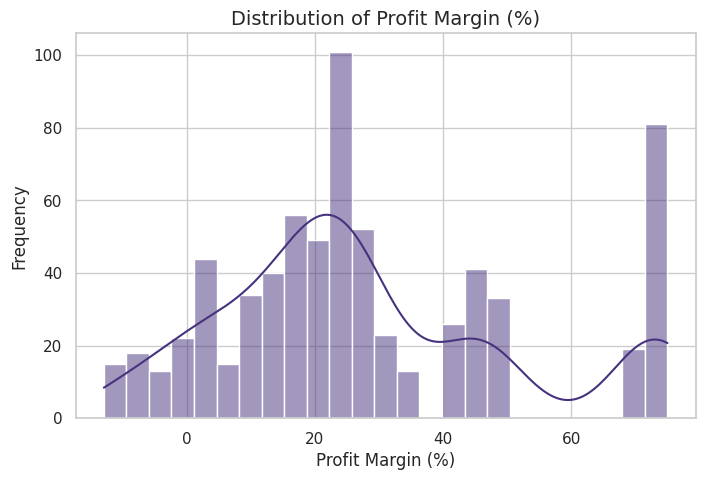

In [18]:
if 'Sales' in df.columns and 'Profit' in df.columns:
    df['Profit_Margin_%'] = (df['Profit'] / df['Sales']) * 100
    plt.figure(figsize=(8,5))
    sns.histplot(df['Profit_Margin_%'], bins=25, kde=True)
    plt.title("Distribution of Profit Margin (%)")
    plt.xlabel("Profit Margin (%)")
    plt.ylabel("Frequency")
    plt.show()

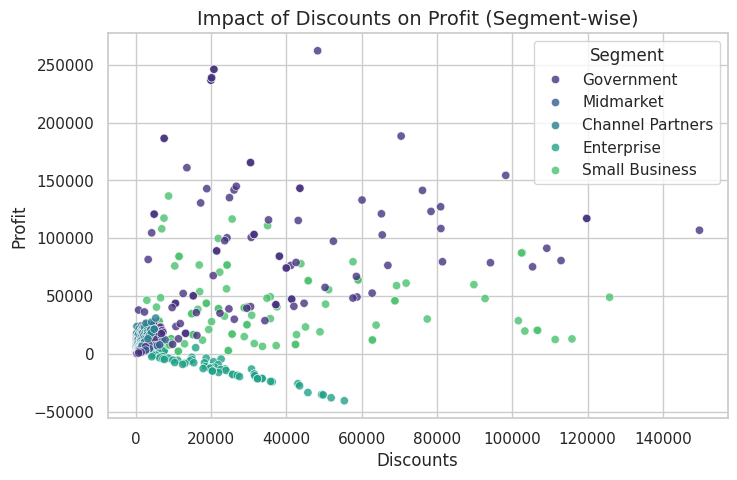

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discounts', y='Profit', hue='Segment', alpha=0.8)
plt.title("Impact of Discounts on Profit (Segment-wise)")
plt.xlabel("Discounts")
plt.ylabel("Profit")
plt.legend(title='Segment')
plt.show()